In this section, I will be using Feature Engineering to create ratio-based behavioral feature, as these are highly effective in Ethereum scam detection.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../Data/Clean/clean_ethereum_data.csv')

1. Will create a column 'sent_received_ratio' to highlight asymmetries in transaction behavior. Scam wallets often show extreme ratios, either receiving large amounts and forwarding them quickly (high ratio), or receiving large volumes with minimal outgoing activity (low ratio).

In [ ]:
#creating new columns for sent and received transactions and avoiding division by zero
df['sent_received_ratio'] = df['sent_tnx'] / (df['received_tnx'] + 1e-5)

Creating a histogram to plot check the distribution

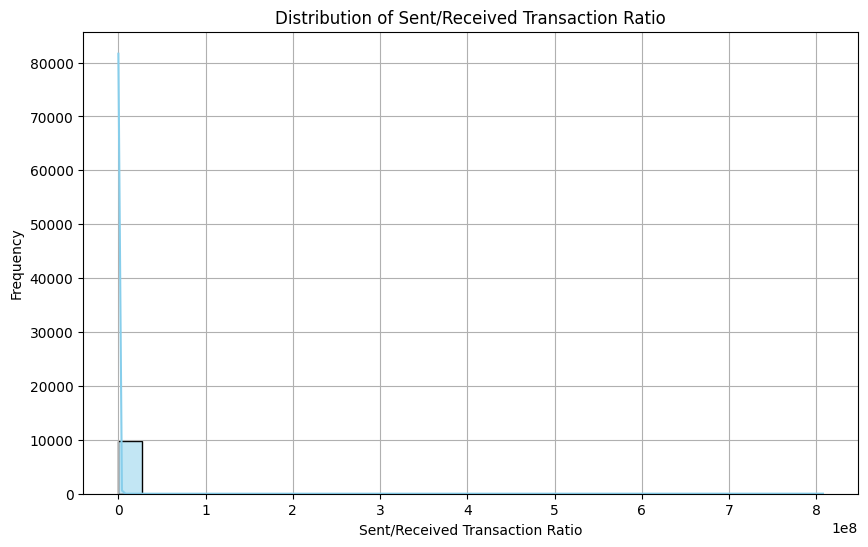

In [11]:
df['log_sent_received_ratio'] = np.log1p(df['sent_received_ratio'])

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sent_received_ratio', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sent/Received Transaction Ratio')
plt.xlabel('Sent/Received Transaction Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Since the chart is not helpful, adjusting the analysis to filter out the top 1% of values to focus on the main distribution:

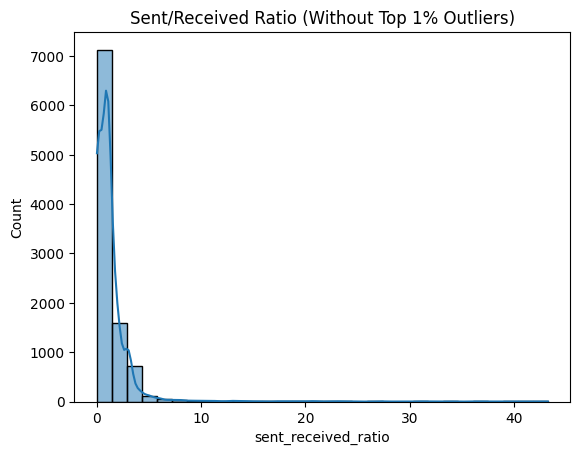

In [12]:
filtered = df[df['sent_received_ratio'] < df['sent_received_ratio'].quantile(0.99)]
sns.histplot(filtered['sent_received_ratio'], bins=30, kde=True)
plt.title('Sent/Received Ratio (Without Top 1% Outliers)')
plt.show()

The histogram of the log-transformed sent/received transaction ratio reveals a highly skewed distribution. The vast majority of addresses are concentrated in the first bar on the left, indicating that most addresses either send and receive transactions at similar rates or have very low overall activity. Only a small number of addresses exhibit much higher ratios, as shown by the few smaller bars extending to the right.

This pattern is typical in blockchain data, where most users have balanced or minimal activity, while a minority display highly unbalanced behavior. These outliers may represent either legitimate high-volume entities (such as exchanges or smart contracts) or potentially suspicious accounts, such as those involved in scams or abnormal transaction patterns.

Further analysis—such as comparing the distributions for scam versus non-scam addresses—can help determine whether this feature is predictive for scam detection.

2. Next will create a Unique Sent-to/Received-from Address Ratio.